In [1]:
import pandas as pd
import numpy as np

listingsDF = pd.read_csv('listings.csv')

reviewsDF = pd.read_csv('reviews.csv')

In [2]:
#We clean reviews first

#We need to remove '(email hidden)', special symbols
reviewsDF = reviewsDF.loc[reviewsDF['reviewer_name'].str.contains(r'[^\x00-\x7F]+') == False]

reviewsDF = reviewsDF.loc[reviewsDF['reviewer_name'].str.contains('email hidden') == False]

#Then replace '()', '-'
reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('[()]', '')

reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('[-]', ' ')

#Then replace 'And' with '&'
reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('And', '&')

#Now we remove all rows with empty cells
reviewsDF = reviewsDF.dropna(axis=0, how='any')

#Convert date from object into datetime
#reviewsDF.date = pd.to_datetime(reviewsDF.date)

#I dont think we need date so dropping it
reviewsDF.drop(columns=['date'], inplace=True)

#Check for row
#reviewsDF.loc[reviewsDF['reviewer_id'] == 12120141]

reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84283 entries, 0 to 84848
Data columns (total 5 columns):
listing_id       84283 non-null int64
id               84283 non-null int64
reviewer_id      84283 non-null int64
reviewer_name    84283 non-null object
comments         84283 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [3]:
#Now we clean listings

#Instead of dropping we select what we need
listingsDF = listingsDF[['id', 'name','description', 
                         'host_id', 'host_name', 'property_type', 'price', 
                         'number_of_reviews', 'review_scores_rating']]

#We drop all rows with empty cells
listingsDF = listingsDF.dropna(axis=0, how='any')

#Remove the '$' from price
listingsDF.price = listingsDF.price.str.replace('[$]', '')

#Remove the ',' from price
listingsDF.price = listingsDF.price.str.replace(',', '')

#Convert price from object to float
listingsDF['price'] = listingsDF['price'].astype(float)

listingsDF.head()

,id,name,description,host_id,host_name,property_type,price,number_of_reviews,review_scores_rating
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,Maija,Apartment,85.0,207,95.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,Andrea,Apartment,150.0,43,96.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,Jill,House,975.0,20,97.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,Emily,House,450.0,38,92.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,326758,Andrew,House,120.0,17,95.0


In [4]:
#We want to merge these 2 DFs, as our main focus is on the reviews, we will use reviewsDF as main
#In reviewsDF, "id" is the primary key, "listing_id" is the foreign key
#In listingsDF, "id" is the primary key
#We want to select where reviews.listings_id = listings.id;
#But since the column name is different, we will rename listingsDF.id to listingsDF.listing_id

listingsDF.rename(columns={'id': 'listing_id'}, inplace=True)
reviewsMDF = pd.merge(reviewsDF, listingsDF, on="listing_id")


In [5]:
reviewsMDF.info()
reviewsMDF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84263 entries, 0 to 84262
Data columns (total 13 columns):
listing_id              84263 non-null int64
id                      84263 non-null int64
reviewer_id             84263 non-null int64
reviewer_name           84263 non-null object
comments                84263 non-null object
name                    84263 non-null object
description             84263 non-null object
host_id                 84263 non-null int64
host_name               84263 non-null object
property_type           84263 non-null object
price                   84263 non-null float64
number_of_reviews       84263 non-null int64
review_scores_rating    84263 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 9.0+ MB


,listing_id,id,reviewer_id,reviewer_name,comments,name,description,host_id,host_name,property_type,price,number_of_reviews,review_scores_rating
0,7202016,38917982,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
1,7202016,39087409,32440555,Frank,Kelly has a great room in a very central locat...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
2,7202016,39820030,37722850,Ian,"Very spacious apartment, and in a great neighb...",Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
3,7202016,40813543,33671805,George,Close to Seattle Center and all it has to offe...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
4,7202016,41986501,34959538,Ming,Kelly was a great host and very accommodating ...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0


In [6]:
#reviewsMDF = reviewsMDF.drop_duplicates('listing_id') #1 review per listing

In [7]:
reviewsMDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84263 entries, 0 to 84262
Data columns (total 13 columns):
listing_id              84263 non-null int64
id                      84263 non-null int64
reviewer_id             84263 non-null int64
reviewer_name           84263 non-null object
comments                84263 non-null object
name                    84263 non-null object
description             84263 non-null object
host_id                 84263 non-null int64
host_name               84263 non-null object
property_type           84263 non-null object
price                   84263 non-null float64
number_of_reviews       84263 non-null int64
review_scores_rating    84263 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 9.0+ MB


In [8]:
#testDF = reviewsMDF.loc[reviewsMDF['listing_id']==7202016]

#I only want the reviews and the reviewer_name
testDF2 = reviewsMDF[['reviewer_name', 'comments']] 

#testDF2.loc[testDF2['reviewer_name']=='Bianca']

testDF2 = testDF2
testDF2.head()

,reviewer_name,comments
0,Bianca,Cute and cozy place. Perfect location to every...
1,Frank,Kelly has a great room in a very central locat...
2,Ian,"Very spacious apartment, and in a great neighb..."
3,George,Close to Seattle Center and all it has to offe...
4,Ming,Kelly was a great host and very accommodating ...


In [9]:
#A1

#First we "clean" the data again (comments only) by removing all punctuations, numbers, and convert all to lowercase. 

#regex library so we can remove the special characters
import re 
import string

pd.set_option('display.max_colwidth', -1)

#We convert all columns and their values to lowercase first
testDF2 = testDF2.apply(lambda x: x.str.lower()) #I do this because i want to convert ALL columns

#Then we remove all numbers because we only want text
testDF2['comments'] = testDF2['comments'].str.replace('\d+', '') #\d stands for any digit and + means 1 or more 

#As you can see we still have '\r' '\n' ',' '.' '()' that we need to remove

testDF2['comments'] = testDF2['comments'].str.replace('[^\w\s]', '') #This removes all the punctuations
testDF2['comments'] = testDF2['comments'].str.replace(r'\n',' ', regex=True) #This relaces the \n with space
testDF2['comments'] = testDF2['comments'].str.replace(r'\r','', regex=True) #\r

testDF2['comments'] = testDF2['comments'].str.replace('[^a-zA-Z]', ' ') 

testDF2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84263 entries, 0 to 84262
Data columns (total 2 columns):
reviewer_name    84263 non-null object
comments         84263 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [31]:
#C1

#Sentiment Analysis
#Input (Corpus) > Output (Positive/Negative) Polarity -1 to 1 | Subjectivity 0 to 1 (Objective - Subjective)

#TextBlob library This is rule-based | We should use Naive Bayes classification
#pip install -U textblob
#python -m textblob.download_corpora
#conda install -c conda-forge textblob #For anaconda

from textblob import TextBlob

sDF = testDF2 #Fresh DF

p = lambda x: TextBlob(x).sentiment.polarity
s = lambda x: TextBlob(x).sentiment.subjectivity

#We apply the polarity and subjectivity columns to the DF
sDF['polarity'] = sDF['comments'].apply(p) 
sDF['subjectivity'] = sDF['comments'].apply(s)

#C3
#We apply 1 - Positive | -1 - Negative

for index, row in sDF.iterrows():
    if(sDF['polarity'][index]>0):
        sDF.at[index, 'sentiment'] = '1'
    elif(sDF['polarity'][index]<0):
        sDF.at[index, 'sentiment'] = '-1'
    else:
        sDF.at[index, 'sentiment'] = '0'


In [32]:
sDF.loc[sDF['sentiment'] == '-1']

,reviewer_name,comments,polarity,subjectivity,sentiment
188,ivaylo,cozy and very private space close to beach shopping main street with restaurants the only thing little uncomfortable and if the weather is cold is that the bathroomshower is outside the room one has to go out through the patio to the main house,-0.128241,0.606019,-1
802,chao,small but cozy easy to downtown,-0.005556,0.661111,-1
959,ryan,the space looks just as seen in pictures artsy and eclectic cory and amanda were extremely welcoming and accommodating,-0.125000,1.000000,-1
1051,esther,this unit is akin to longterm corporate housing the condo unit is clean and neat but pedestrian the kitchen has pots and pans dishes and utensils but it lacks cooking oil and any spices other than salt and pepper the knives are dull and need to be sharpened making them dangerous the unit is also managed by stay alfred which describes itself as a corporate manager nothing wrong with the unit but it was not what we expected normally our airbnb stays have been second homes or run by families the location is excellent and in the heart of downtown seattle walking distance to the pike marketplace whole foods and clothes shopping the location is also across the street from the usdc which would make for an excellent war room for litigators and lengthy trials the reception and unit is cold and uninviting for example shampoos and conditioners are in little bottles like in a hotel this place is strictly business again nothing wrong with the place just different from our expectations,-0.011029,0.577941,-1
1358,vishal,i stayed here for only nights and i think it was not at par with the airbnb experiences i had elsewhere it is a big dark and cold house with several rooms the shared room had bunk beds with weird curtains on them i assume for privacy but rooms get dark and uncomfortable the coffee machine is very old and there are lots a lots of instructions on walls for just about everything on the other hand it is easy to get to using public transportation and has some great views of mt rainier,-0.050897,0.552692,-1
...,...,...,...,...,...
83198,wylie,i was in a jam with no place to stay late in the afternoon roger was timely with his response and accommodating for a late arrival thank you for sharing your home cheers,-0.300000,0.600000,-1
83390,haeyoung,my sister and i stayed at julies for a night julie was very understanding and flexible when we were stuck in traffic to meet her for the key the room we stayed in was very cozy and comfortable there were other guests in the house and the walls were very thin they were watching something and we were able to hear everything late into the night but we were so tired anyway we fell asleep pretty quickly overall julies place was close to everywhere we needed to go it was very convenient,-0.004583,0.639583,-1
83395,vladislav,julie was very accommodating my girlfriend and is flights were delayed and this didnt cause any issues with the host even though we were late,-0.050000,0.450000,-1
83761,shucheng,following the last review however there are things that i would give people a headsup about checkin is not flexible and we werent able to check in until after pm at a rainy night although there is still controversy over who is to blame for messages not getting through the house is not soundproof at all and people from lower floor could hear those from upper floor do everything so if you at least want to talk even at a low voice it would be rendered impossible because it would disturb others ask the host about facilities and house rules like keeping voice low at what time period or what service is covered and what instructions are to be followed upon arrival because we werent shown rooms other than bedrooms until the day of departure including laundry room and yoga room never shown so even if kazami is highly recommended as person you should think twice about taking him as host,-0.043167,0.370667,-1


In [33]:
sDF = sDF.reset_index(drop=True)

In [34]:
sDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84263 entries, 0 to 84262
Data columns (total 5 columns):
reviewer_name    84263 non-null object
comments         84263 non-null object
polarity         84263 non-null float64
subjectivity     84263 non-null float64
sentiment        84263 non-null object
dtypes: float64(2), object(3)
memory usage: 3.2+ MB


In [42]:
sDF = sDF.drop(sDF[sDF['sentiment']== '0'].index) #Dont want neutral reviews

In [43]:
sDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82711 entries, 0 to 84262
Data columns (total 5 columns):
reviewer_name    82711 non-null object
comments         82711 non-null object
polarity         82711 non-null float64
subjectivity     82711 non-null float64
sentiment        82711 non-null object
dtypes: float64(2), object(3)
memory usage: 3.8+ MB


In [44]:
#??????

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

VM = sDF[['comments', 'sentiment']]

#This will vectorize all the words into "vocab" array
vect = CountVectorizer(binary=True)
# x = vect.fit_transform(VM.comments)
# x.toarray()

In [45]:

# Splitting into train and test set
X = VM.comments
y = VM.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#Fit the vectorizer on training set
X_train_vect = vect.fit_transform(X_train) 

X_test.shape #16543

#Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

nb.score(X_train_vect, y_train)

X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)




Accuracy: 99.20%

Cnfusion Matrix:
 [[    8    85]
 [   47 16403]]


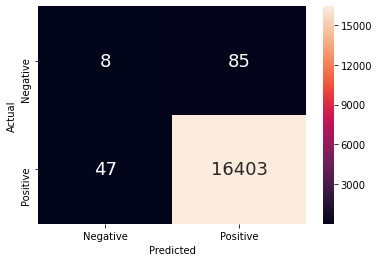

In [46]:

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt     


labels = ['Negative', 'Positive']


ax = plt.subplot()

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)


print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nCnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [18]:
#Use this to show positive vs negative words

P['sentiment'] = sDF[sDF['sentiment'] == 'Positive']
P = sDF['comments']
N = sDF[sDF['sentiment'] == 'Negative']
N = sDF['comments']

P['sentiment']
# combP = ' '.join(P)
# combN = ' '.join(N)

# combN

# cloud = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=100, random_state=30)
# cloud2 = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=100, random_state=30)

# plt.rcParams['figure.figsize'] = [16, 6]

# wordcloud = cloud.generate(combP)
# wordcloud2 = cloud2.generate(combN)


# f, (ax1, ax2) = plt.subplots(1, 2)

# ax1.imshow(wordcloud)
# ax1.axis("off")

# ax2.imshow(wordcloud2)
# ax2.axis("off")

NameError: name 'P' is not defined